In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('./preprocess.csv')

In [3]:
df

,Unnamed: 0,N,P,K,temperature,humidity,rainfall,label
0,0,90,42,43,20.879744,82.002744,202.935536,20
1,1,85,58,41,21.770462,80.319644,226.655537,20
2,2,60,55,44,23.004459,82.320763,263.964248,20
3,3,74,35,40,26.491096,80.158363,242.864034,20
4,4,78,42,42,20.130175,81.604873,262.717340,20
...,...,...,...,...,...,...,...,...
2195,2195,107,34,32,26.774637,66.413269,177.774507,5
2196,2196,99,15,27,27.417112,56.636362,127.924610,5
2197,2197,118,33,30,24.131797,67.225123,173.322839,5
2198,2198,117,32,34,26.272418,52.127394,127.175293,5


In [5]:
df=df.drop(columns='Unnamed: 0')

In [6]:
df

,N,P,K,temperature,humidity,rainfall,label
0,90,42,43,20.879744,82.002744,202.935536,20
1,85,58,41,21.770462,80.319644,226.655537,20
2,60,55,44,23.004459,82.320763,263.964248,20
3,74,35,40,26.491096,80.158363,242.864034,20
4,78,42,42,20.130175,81.604873,262.717340,20
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,177.774507,5
2196,99,15,27,27.417112,56.636362,127.924610,5
2197,118,33,30,24.131797,67.225123,173.322839,5
2198,117,32,34,26.272418,52.127394,127.175293,5


In [8]:
from imblearn.combine import SMOTETomek

In [9]:
x=df[['N','P','K','humidity','rainfall']]
y=df['label']
print(x.shape)
print(y.shape)

(2200, 5)
(2200,)


In [12]:
print(x.value_counts().head())
print(y.value_counts())

N   P   K   humidity   rainfall  
0   5   36  90.886124  105.529185    1
69  60  54  93.061344  141.173693    1
    37  42  83.370118  251.055000    1
    46  41  80.285979  263.110330    1
    47  40  76.240367  183.827079    1
dtype: int64
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label, dtype: int64


In [13]:
x_sam,y_sam=SMOTETomek().fit_resample(x,y)

In [14]:
print(y_sam.value_counts())

12    100
0     100
3     100
9     100
18    100
14    100
4     100
17    100
19    100
1     100
16    100
7     100
21    100
15    100
6      99
5      99
10     98
11     97
2      97
13     97
20     97
8      96
Name: label, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_sam,y_sam, test_size=0.15, random_state=111)

In [19]:
x_train

,N,P,K,humidity,rainfall
1157,9,21,32,53.560928,95.940354
1734,36,54,46,94.944821,214.410385
812,18,66,22,67.551090,47.896452
1086,2,40,27,47.548852,90.095869
1573,1,135,203,92.701240,113.775922
...,...,...,...,...,...
118,99,50,15,71.094453,88.077537
681,26,54,17,88.957045,49.489725
86,81,53,42,81.035693,233.703497
724,39,60,21,63.599486,64.727971


In [20]:
x_test

,N,P,K,humidity,rainfall
846,32,78,22,62.355576,53.409060
1089,25,22,25,45.535566,95.705259
1551,33,134,205,94.339195,114.741273
1077,96,86,51,76.987408,91.999647
18,77,38,36,80.192301,224.555017
...,...,...,...,...,...
1144,11,34,32,49.409833,97.551555
2064,90,50,44,73.486560,171.471638
249,56,67,78,16.718266,77.818914
1441,109,12,48,92.125347,20.762120


In [21]:
y_train

1157    12
1734    17
812     10
1086    12
1573     0
        ..
118     11
681     14
86      20
724      2
2004     8
Name: label, Length: 1853, dtype: int64

In [22]:
y_test

846     10
1089    12
1551     0
1077     1
18      20
        ..
1144    12
2064     8
249      3
1441    15
260      3
Name: label, Length: 327, dtype: int64

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

In [26]:
etc=ExtraTreesClassifier(min_samples_split=7,random_state=111)

In [27]:
etc.fit(x_train,y_train)
ETC=etc.score(x_test,y_test)
ETC

0.9969418960244648

In [29]:
import joblib

In [32]:
joblib.dump(etc,'./mod.plk')

['./mod.plk']

In [33]:
pre=joblib.load('./mod.plk')

In [34]:
pre

ExtraTreesClassifier(min_samples_split=7, random_state=111)

In [37]:
N=input()
P=input()
K=input()
h=input()
r=input()

33
33
33
33
33


In [40]:
val=np.array([[N,P,K,h,r]])
ans=pre.predict(val)

C:\Users\GTSHADOOP\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [41]:
ans

array([13], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [50]:
y_pred=etc.predict(x_test)
mat= confusion_matrix(y_test,y_pred)


In [52]:

print(mat)
mat

[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

array([[15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0,

([<matplotlib.axis.XTick at 0x1eafb6a8df0>], [Text(0, 0, 'ETC')])

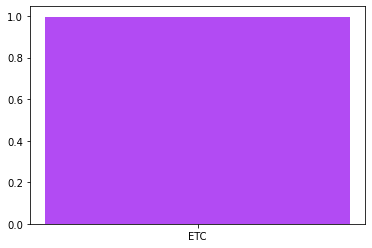

In [124]:
import matplotlib.pyplot as plt
CTE=0.76
CTS=0.80

bars=('ETC',)
plt.bar([0],ETC,color='#B24BF3')
plt.xticks([0],bars)


([<matplotlib.axis.XTick at 0x1eafb650a90>,
 [Text(0, 0, 'x'), Text(1, 0, 'y'), Text(2, 0, 'z')])

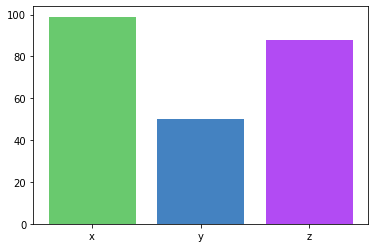

In [133]:
import matplotlib.pyplot as plt
x=99
y=50
z=88
bars=('x','y','z')
val=(x,y,z)
plt.bar([0,1,2],val,color=['#69C96E', '#4482C1', '#B24BF3'])
plt.xticks([0,1,2],bars)

In [118]:
n=('h','a','r')
np.arange(len(n))

array([0, 1, 2])